In [2]:
import mwclient
import time



In [2]:
site = mwclient.Site('en.wikipedia.org')
page = site.pages['Bitcoin']

In [3]:
revs = list(page.revisions())

In [4]:
revs = sorted(revs, key=lambda rev: rev['timestamp'])

In [5]:
revs[0]

OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [6]:
from transformers import pipeline 
sentiment_pipeline = pipeline('sentiment-analysis')

def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent['score']
    if sent['label'] == "NEGATIVE":
        score = -score
    return score



C:\Users\meddi\PycharmProjects\personal_projects\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
edits = {}

for rev in revs:
    date = time.strftime("%Y-%m-%d", rev['timestamp'])
    if date not in edits:
        edits[date] = dict(sentiments=list(), edit_count=0)
    edits[date]["edit_count"] += 1
    comment = rev.get("comment", "")
    edits[date]["sentiments"].append(find_sentiment(comment))

In [8]:
from statistics import mean

for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]['sentiments'] if s < 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0
        
    del edits[key]["sentiments"]

In [9]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient='index')

In [10]:
edits_df

,edit_count,sentiment,neg_sentiment
2009-03-08,4,-0.550525,0.750000
2009-08-05,1,0.748121,0.000000
2009-08-06,2,0.995746,0.000000
2009-08-14,1,0.930021,0.000000
2009-10-13,2,-0.227500,0.500000
...,...,...,...
2024-10-21,1,0.879291,0.000000
2024-10-29,3,0.317756,0.333333
2024-10-31,3,-0.343412,0.666667
2024-11-09,1,0.995352,0.000000


In [11]:
edits_df.index = pd.to_datetime(edits_df.index)

In [12]:
from datetime import datetime

dates = pd.date_range(start='2009-03-08', end=datetime.today())

In [13]:
edits_df = edits_df.reindex(dates, fill_value=0)

In [14]:
edits_df

,edit_count,sentiment,neg_sentiment
2009-03-08,4,-0.550525,0.75
2009-03-09,0,0.000000,0.00
2009-03-10,0,0.000000,0.00
2009-03-11,0,0.000000,0.00
2009-03-12,0,0.000000,0.00
...,...,...,...
2024-11-09,1,0.995352,0.00
2024-11-10,4,-0.559602,0.75
2024-11-11,0,0.000000,0.00
2024-11-12,0,0.000000,0.00


In [15]:
rolling_edits = edits_df.rolling(30, min_periods=30).mean()

In [16]:
rolling_edits = rolling_edits.dropna()

In [17]:
rolling_edits

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-11-09,0.300000,0.028332,0.066667
2024-11-10,0.433333,0.009679,0.091667
2024-11-11,0.400000,0.042980,0.058333
2024-11-12,0.400000,0.042980,0.058333


In [18]:
rolling_edits.to_csv('wikipedia_edits.csv')

In [3]:
import yfinance as yf
import os 
import pandas as pd

In [4]:
btc_ticker = yf.Ticker('BTC-USD')

In [5]:
if os.path.exists('btc.csv'):
    btc = pd.read_csv('btc.csv', index_col=0)
else:
    btc = btc_ticker.history(period='max')
    btc.to_csv('btc.csv')


In [6]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,75637.085938,76943.117188,74480.421875,75904.859375,63467654989,0.0,0.0
2024-11-08 00:00:00+00:00,75902.835938,77252.750000,75648.742188,76545.476562,55176858003,0.0,0.0
2024-11-09 00:00:00+00:00,76556.187500,76932.765625,75773.789062,76778.867188,29009480361,0.0,0.0


In [7]:
btc.index = pd.to_datetime(btc.index)

In [8]:
del btc["Dividends"]
del btc["Stock Splits"]

In [9]:
btc.columns = [c.lower() for c in btc.columns]

In [10]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-11-07 00:00:00+00:00,75637.085938,76943.117188,74480.421875,75904.859375,63467654989
2024-11-08 00:00:00+00:00,75902.835938,77252.750000,75648.742188,76545.476562,55176858003
2024-11-09 00:00:00+00:00,76556.187500,76932.765625,75773.789062,76778.867188,29009480361


<Axes: xlabel='Date'>

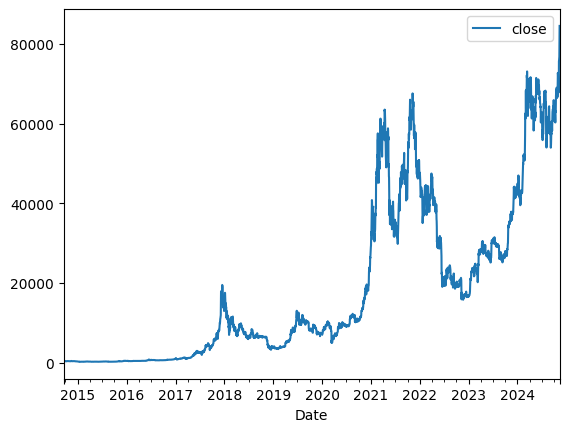

In [11]:
btc.plot.line(y='close', use_index=True)

In [12]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)

In [13]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-11-09,0.300000,0.028332,0.066667
2024-11-10,0.433333,0.009679,0.091667
2024-11-11,0.400000,0.042980,0.058333
2024-11-12,0.400000,0.042980,0.058333


In [14]:
wiki.index = wiki.index.tz_localize("UTC")

In [15]:
# converting time zone
print(btc.index.tz)
print(wiki.index.tz)

UTC
UTC


In [16]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [17]:
btc['tomorrow'] = btc['close'].shift(-1)

In [18]:
btc['target'] = (btc['tomorrow'] > btc["close"]).astype(int)

In [19]:
btc["target"].value_counts()

target
1    1961
0    1748
Name: count, dtype: int64

In [20]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,75637.085938,76943.117188,74480.421875,75904.859375,63467654989,0.266667,-0.004846,0.066667,76545.476562,1
2024-11-08 00:00:00+00:00,75902.835938,77252.750000,75648.742188,76545.476562,55176858003,0.266667,-0.004846,0.066667,76778.867188,1
2024-11-09 00:00:00+00:00,76556.187500,76932.765625,75773.789062,76778.867188,29009480361,0.300000,0.028332,0.066667,80474.187500,1
2024-11-10 00:00:00+00:00,76775.546875,81474.421875,76565.429688,80474.187500,82570594495,0.433333,0.009679,0.091667,84506.726562,1


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,75637.085938,76943.117188,74480.421875,75904.859375,63467654989,0.266667,-0.004846,0.066667,76545.476562,1
2024-11-08 00:00:00+00:00,75902.835938,77252.750000,75648.742188,76545.476562,55176858003,0.266667,-0.004846,0.066667,76778.867188,1
2024-11-09 00:00:00+00:00,76556.187500,76932.765625,75773.789062,76778.867188,29009480361,0.300000,0.028332,0.066667,80474.187500,1
2024-11-10 00:00:00+00:00,76775.546875,81474.421875,76565.429688,80474.187500,82570594495,0.433333,0.009679,0.091667,84506.726562,1


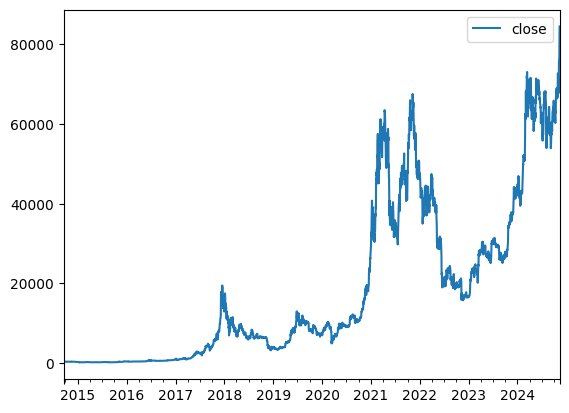

In [22]:
btc.index = pd.to_datetime(btc.index)
# del btc["Dividends"]
# del btc["Stock Splits"]
btc.columns = [c.lower() for c in btc.columns]
btc.plot.line(y='close', use_index=True)
btc

In [23]:
btc.to_csv("merged_btc.csv")

In [59]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)
# wiki.index = wiki.index.tz_localize("UTC")
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-11-07,0.266667,-0.004846,0.066667
2024-11-08,0.266667,-0.004846,0.066667
2024-11-09,0.300000,0.028332,0.066667
2024-11-10,0.433333,0.009679,0.091667


In [63]:
btc = btc.tz_localize(None) if btc.index.tz else btc
wiki = wiki.tz_localize(None) if wiki.index.tz else wiki

In [64]:
# converting time zone
print(btc.index.tz)
print(wiki.index.tz)

None
None


In [65]:
btc_before = btc
wiki_before = wiki

In [66]:
btc_common = btc_before.reindex(wiki_before.index, method='nearest')
wiki_common = wiki.reindex(btc_before.index, method='nearest')

In [67]:
btc_after = btc_common.merge(wiki_common, left_index=True, right_index=True)

In [68]:
btc_after

,date,open,high,low,close,volume,edit_count,sentiment,neg_sentiment


In [ ]:

# btc = btc.merge(wiki, left_index=True, right_index=True)
# btc['tomorrow'] = btc['close'].shift(-1)
# btc['target'] = (btc['tomorrow'] > btc["close"]).astype(int)
# btc["target"].value_counts()


In [ ]:
print(btc.dtypes)
print(wiki.dtypes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision = precision_score(test["target"], preds)
print(precision)

In [ ]:
def predict(train, test, predictors, model):
    from sklearn.ensemble import RandomForestClassifier
    model.fit(train[predictors], train["target"]) 
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='predictions')
    precision = precision_score(test["target"], preds)
    combined = pd.concat([test["target"], preds], axis=1)
    return combined
    

In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=0.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

In [ ]:
import torch.nn as nn
import torch

class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
        
    def forward(self, x):
        h0 = torch.zeros(x.size(1), self.num_layers, self.hidden_size).cuda()
        c0 = torch.zeros(x.size(1), self.num_layers, self.hidden_size).cuda()
        print("h0 shape", h0.shape)
        print("c0", c0.shape)
        print("x", x.shape)
        
        output, _ = self.lstm(x, (h0, c0))
        out = self.fc(output[:, -1, :])
        return out

In [ ]:
sequence_length = 10 
input_size = len(predictors)
batch_size = 32

In [ ]:
def create_sequence(data, target, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i: i + sequence_length])
        y.append(target[i + sequence_length])
        print("iteration:", i)
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

x_train = torch.tensor(train[predictors].values, dtype=torch.float32)
y_train = torch.tensor(train["target"].values, dtype=torch.int32)
x_test = torch.tensor(test[predictors].values, dtype=torch.float32)
y_test = torch.tensor(test["target"].values, dtype=torch.int32)


In [ ]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)

In [ ]:
x_train_seq, y_train_seq = create_sequence(x_train, y_train, sequence_length)
x_test_seq, y_test_seq = create_sequence(x_test, y_test, sequence_length)


In [ ]:
# train_dataset = TensorDataset(x_train, y_train)
# test_dataset = TensorDataset(x_test, y_test)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

train_dataset = TensorDataset(x_train_seq, y_train_seq)
test_dataset = TensorDataset(x_test_seq, y_test_seq)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
lstmModel = LSTMCell(input_size=x_train.shape[1], hidden_size=128, output_size=1)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(lstmModel.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    lstmModel.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        predictions = lstmModel(x)
        loss = criterion(predictions, y)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}.. , Loss: {loss.item():.4f}")